In [7]:
%load_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import nn4n
from nn4n.model import CTRNN
from nn4n.structure import MultiAreaEI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CTRNN under default settings

Linear Layer: 
   | in_size:    1
   | out_size:   100
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([100, 1])
   | weight_min: -0.980525016784668
   | weight_max: 0.9670503735542297
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



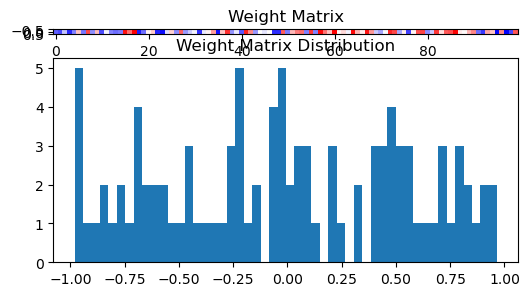

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           1.0

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1
   | in_size:          100
   | out_size:         100
   | distribution:     normal
   | bias:             False
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.35354265570640564
   | weight_max:       0.37290605902671814
   | weight_mean:      0.00021482727606780827
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.99
   | spectral_radius:  1.0



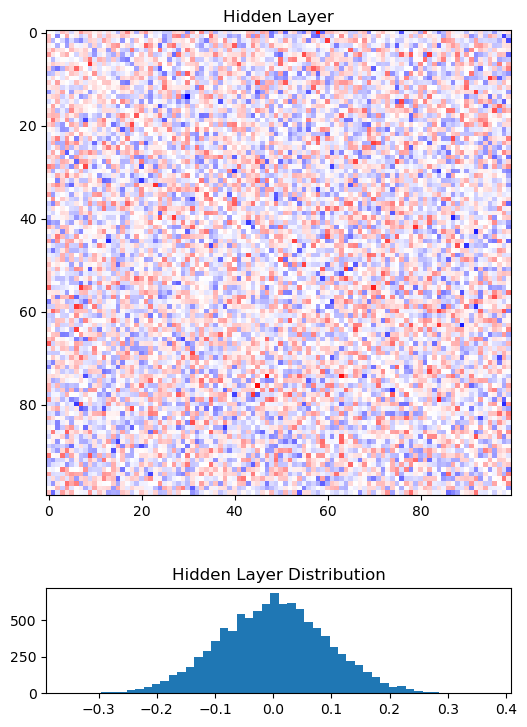

Linear Layer: 
   | in_size:    100
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 100])
   | weight_min: -0.0999758169054985
   | weight_max: 0.09752070903778076
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



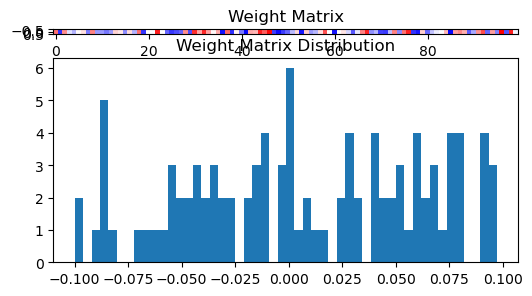

In [2]:
rnn = CTRNN()
rnn.print_layers()

## Positive value only in the hidden layer

Linear Layer: 
   | in_size:    1
   | out_size:   100
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([100, 1])
   | weight_min: -0.916640043258667
   | weight_max: 0.970865786075592
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



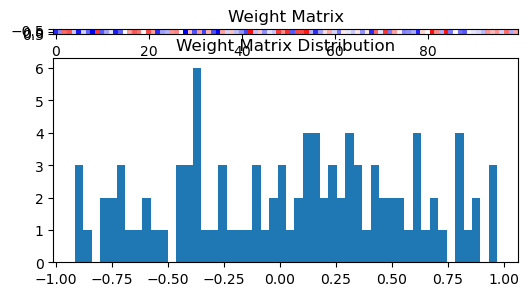

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           1.0

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1
   | in_size:          100
   | out_size:         100
   | distribution:     normal
   | bias:             False
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.0032943724654614925
   | weight_max:       0.02472079172730446
   | weight_mean:      0.009999594651162624
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.99
   | spectral_radius:  1.0



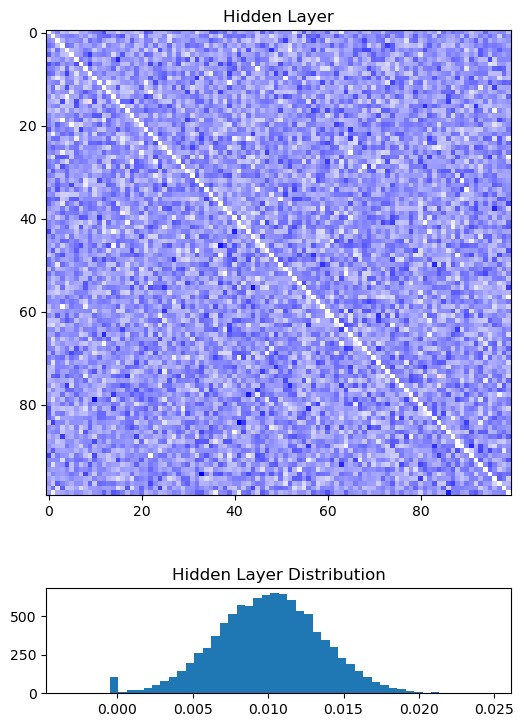

Linear Layer: 
   | in_size:    100
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09982426464557648
   | weight_max: 0.09870007634162903
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



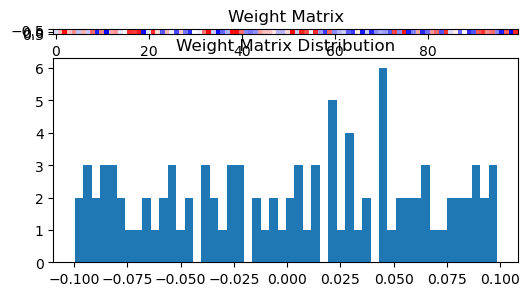

In [3]:
rnn = CTRNN(allow_negative=[True, False, True])
rnn.print_layers()

## Train on a simple sin wave prediction task

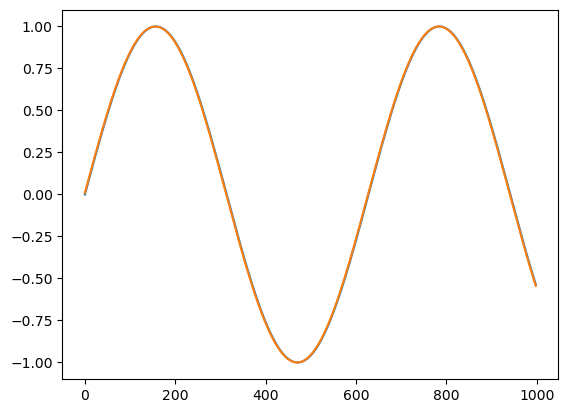

In [4]:
# predict sin wave
inputs = np.sin(np.linspace(0, 10, 1000))
inputs = torch.from_numpy(inputs).float().unsqueeze(1).unsqueeze(1)
labels = inputs[1:]
inputs = inputs[:-1]

plt.plot(inputs.squeeze(1).squeeze(1).numpy())
plt.plot(labels.squeeze(1).squeeze(1).numpy())
plt.show()

In [5]:
rnn = CTRNN(input_dim=1, hidden_size=10, output_dim=1)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

losses = []
for epoch in range(500):
    outputs, _ = rnn(inputs)
    loss = torch.nn.MSELoss()(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


Epoch 0 Loss 0.2747730612754822
Epoch 50 Loss 0.03743642196059227
Epoch 100 Loss 0.0034806448966264725
Epoch 150 Loss 0.003441933076828718
Epoch 200 Loss 0.0030327150598168373
Epoch 250 Loss 0.0029804871883243322
Epoch 300 Loss 0.0029848988633602858
Epoch 350 Loss 0.002864121226593852
Epoch 400 Loss 0.0029612623620778322
Epoch 450 Loss 0.002786827739328146


## Use CTRNN with a mask

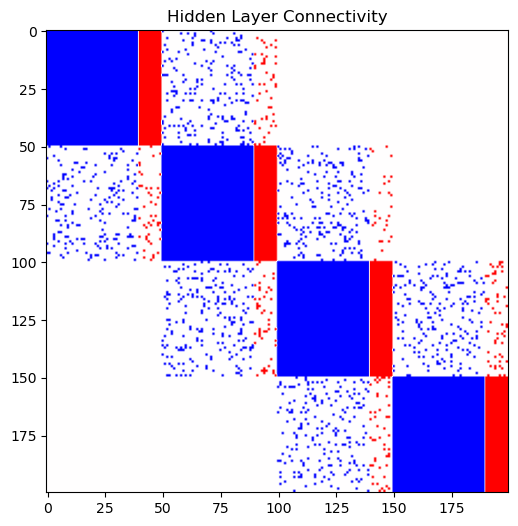

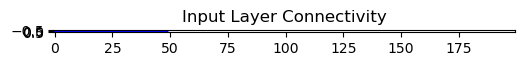

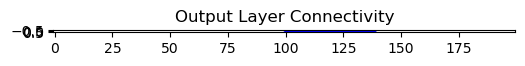

In [6]:
area_connectivities = np.array([
    [1.0, 0.1, 0.0, 0.0],
    [0.1, 1.0, 0.1, 0.0],
    [0.0, 0.1, 1.0, 0.1],
    [0.0, 0.0, 0.1, 1.0],
])

struct_params = {
    "n_areas": 4,
    "exc_pct": 0.8,
    "area_connectivities": area_connectivities,
    "input_areas": [0],
    "output_areas": [2],
    "input_dim": 1,
    "output_dim": 1,
    "hidden_size": 200,
    "inter_area_connections": [True, True, True, True],
    "inh_output": False,
}

network_struct = MultiAreaEI(**struct_params)
network_struct.visualize()

In [35]:
model_params = {
    # size
    "input_dim": 1,
    "hidden_size": 200,
    "output_dim": 1,
    
    # hyperparameters
    "tau": 50,
    "use_dale": True,
    "spec_rad": 1.5,
    "dt": 1,
    "activation": "relu",
    "recurrent_noise": 0.05,
    "new_synapse": False,
    "self_connections": False,
    "ei_balance": "synapse",

    # bias and distribution
    "layer_biases": [False, False, False],
    "layer_distributions": ['uniform', 'normal', 'uniform'],

    # masks
    "layer_masks": [network_struct.input_mask, network_struct.hidden_mask, network_struct.output_mask],
}

Linear Layer: 
   | in_size:    1
   | out_size:   200
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([200, 1])
   | weight_min: 0.0
   | weight_max: 0.9881537556648254
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



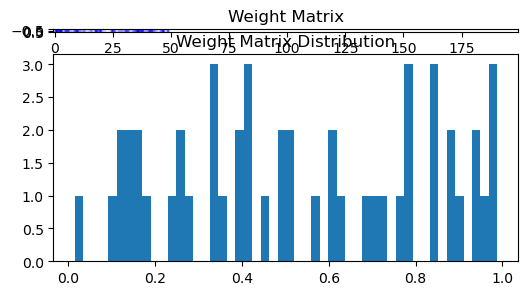

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           0.02

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1.5
   | in_size:          200
   | out_size:         200
   | distribution:     normal
   | bias:             False
   | dale:             True
   | shape:            torch.Size([200, 200])
   | weight_min:       -0.6469787359237671
   | weight_max:       0.17639891803264618
   | weight_mean:      -6.71178349875845e-05
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.283425
   | spectral_radius:  1.5



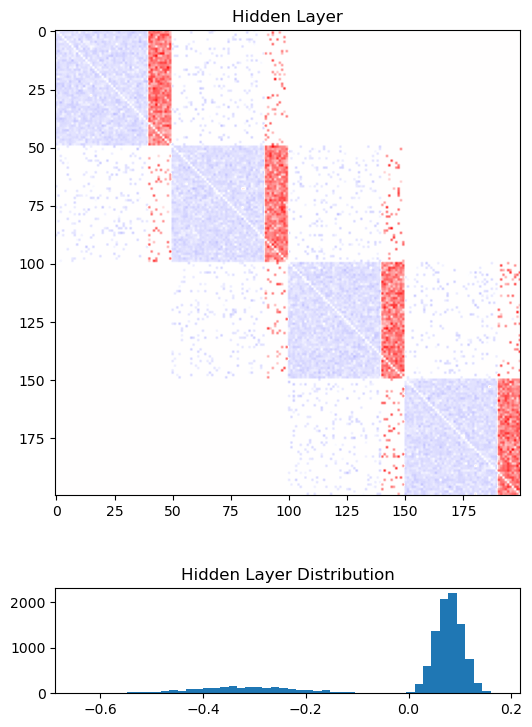

Linear Layer: 
   | in_size:    200
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 200])
   | weight_min: 0.0
   | weight_max: 0.3438715934753418
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.2



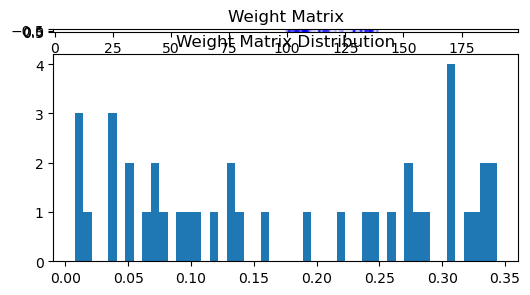

In [36]:
rnn = CTRNN(**model_params)
rnn.print_layers()